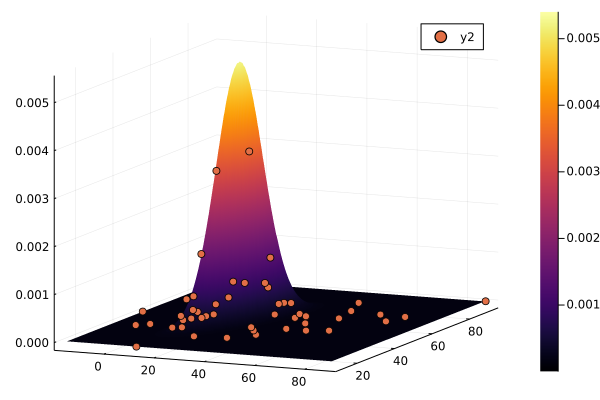

In [64]:
# Train data
using Distributions
N = 50
D = 2
μ = [25; 50]
Σ = [
    600 90
    90 400
]
Λ = inv(Σ)

Xᵗ = rand(MvNormal(μ, Σ), N)

# Test data
Xᵖ = rand(MvNormal(μ, Σ), 50)

# Hyperparameter
m = [0; 0]
β = 1
ν = 2
W = [
    0.0005 0
    0 0.0005
]

# Training
β̂ = N+β
m̂ = inv(β̂)*(sum(Xᵗ, dims=2)+β*m)

invŴ = inv(β*m*m'-β̂*m*m'+W)
for n in 1:N
    xₙ = Xᵗ[:,n]
    invŴ += xₙ*xₙ'
end

Ŵ = inv(invŴ)
ν̂ = N+ν

# Prediction
μ̂ₛ = m̂
Λ̂ₛ = ((1-D+ν̂)β̂/1+β̂)*Ŵ
ν̂ₛ = 1-D+ν̂

# Plot
using SpecialFunctions: gamma
using LinearAlgebra
using Plots

const Γ = gamma

St(x) = Γ(0.5(ν̂ₛ+D))/Γ(0.5ν̂ₛ) * √(det(Λ̂ₛ))/(π*ν̂ₛ)^(0.5D) * (1+inv(ν̂ₛ)*dot((x.-μ̂ₛ)', Λ̂ₛ, (x.-μ̂ₛ)))^(-0.5(ν̂ₛ+D))
St(x, y) = St([x, y])
xs = minimum(Xᵖ[1,:]):0.5:maximum(Xᵖ[1,:])
ys = minimum(Xᵖ[2,:]):0.5:maximum(Xᵖ[2,:])
zs = St.(xs', ys)
p = surface(xs, ys, zs)

xs = Xᵖ[1,:]
ys = Xᵖ[2,:]
zs = St.(xs, ys)
scatter!(p, xs, ys, zs)